In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from glob import glob

In [9]:
# 경로확인하기
os.listdir()

['.DS_Store',
 '01.데이터_준비하기~이미지 분석_.ipynb',
 '03.fit_generator_Image_Transformation.ipynb',
 '02.데이터의_학습에_대한_이해.ipynb',
 '.ipynb_checkpoints']

In [10]:
# 해당 경로에 있는 해당 파일을 가져옴
data_paths = glob('../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/*/*.png')

In [11]:
path = data_paths[0]
path

'../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/9/36655.png'

In [13]:
# tensor 타입으로 가져오기
data_paths = tf.io.matching_files('../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/mnist_png/training/*/*.png')
data_paths[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'../../../Library/Mobile Documents/com~apple~CloudDocs/\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0\xec\x82\xac\xec\x9d\xb4\xec\x96\xb8\xed\x8b\xb0\xec\x8a\xa4\xed\x8a\xb8/\xeb\x94\xa5\xeb\x9f\xac\xeb\x8b\x9d:AI/Part3) \xec\x9d\xb4\xeb\xaf\xb8\xec\xa7\x80 \xeb\xb6\x84\xec\x84\x9d\xec\x9c\xbc\xeb\xa1\x9c \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 tensorflow 2.0\xea\xb3\xbc Pytorch/dataset/mnist_png/training/0/1.png'>

## Load Image

In [14]:
# 데이터 로드
gfile = tf.io.read_file(path)

In [15]:
image = tf.io.decode_image(gfile)

In [16]:
image.shape

TensorShape([28, 28, 1])

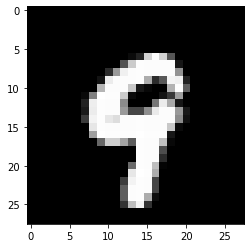

In [18]:
plt.imshow(image[:,:,0], 'gray')
plt.show()

## Set Data Generator

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
# 이미지에 차원추가
inputs = image[tf.newaxis, ...]

In [22]:
inputs.shape

TensorShape([1, 28, 28, 1])

In [24]:
# 전처리 할것을 작성
# ex) 서있는 고양이를 학습시켰는데 테스트로 누워있는 고양이를 할경우 
# 랜덤하게 고양이를 위치시켜서 확인하는 방법

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

0.0 254.08815 38.232025


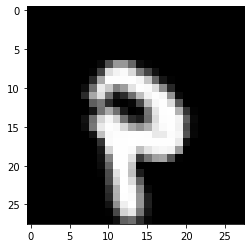

In [67]:
# iter 안에 있는 값을 꺼내고 없을경우 next의 값을 출력
result = next(iter(datagen.flow(inputs)))

print(np.min(result), np.max(result), np.mean(result))

plt.imshow(np.squeeze(result), 'gray')
plt.show()

## Transformation

- width_shift_range  
- height_shift_range  
  
- brightness_range  
- zoom_range  
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function (원하는 함수를 작성하여 입력)

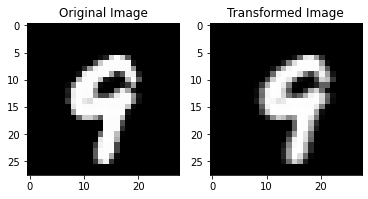

In [129]:
# width_shift_range
datagen = ImageDataGenerator(
    width_shift_range =0.3
)

result = next(iter(datagen.flow(inputs)))

# 원본데이터 이미지
plt.subplot(121)
plt.title("Original Image")
plt.imshow(inputs[0, :, :, 0], 'gray')

# 트랜스폼한 이미지
plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

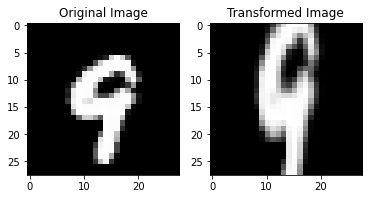

In [118]:
# zoom_range

datagen = ImageDataGenerator(
    zoom_range=0.7
)

result = next(iter(datagen.flow(inputs)))

# 원본데이터 이미지
plt.subplot(121)
plt.title("Original Image")
plt.imshow(inputs[0, :, :, 0], 'gray')

# 트랜스폼한 이미지
plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Rescale시 주의사항

In [101]:
# rescale은 train과 test 둘다 해줘야함
# Transformation은 train에만 작성
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)